### Międzynarodowy handel szczepionkami medycznymi jako sieć złożona

Tematem projektu jest rezprezentacja międzynarodowego handlu dotyczącego szczepionek medycznych w postaci sieci złożonej.  
Źródło danych: http://wits.worldbank.org/   
Dane pobierane są w postaci pliku CSV. Zawierają informacje zarówno o eksporcie jak i imporcie wyżej wspomnianych dóbr między państwami.

**1. Importowanie bibliotek**

In [259]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import pandas as pd
import collections
import seaborn as sns

**2. Wczytanie danych**

In [260]:
df = pd.read_csv('DataJobID-2418259_2418259_MedicineTrade.csv', delimiter=',', encoding='utf-8',encoding_errors='ignore')
df.head()

ReporterISO3  ProductCode ReporterName PartnerISO3           PartnerName  \
0          AGO       300220       Angola         ARE  United Arab Emirates   
1          AGO       300220       Angola         ARE  United Arab Emirates   
2          AGO       300220       Angola         ARE  United Arab Emirates   
3          AGO       300220       Angola         BEL               Belgium   
4          AGO       300220       Angola         BEL               Belgium   

   Year TradeFlowName  TradeFlowCode  TradeValue in 1000 USD  
0  2018        Import              5                 164.320  
1  2019        Import              5                   8.043  
2  2021        Import              5               10831.766  
3  2018        Import              5                6330.754  
4  2019        Import              5                1317.950

In [261]:
df.shape

(21951, 9)

**3. Transformacja danych**

In [262]:
df.columns

Index(['ReporterISO3', 'ProductCode', 'ReporterName', 'PartnerISO3',
       'PartnerName', 'Year', 'TradeFlowName', 'TradeFlowCode',
       'TradeValue in 1000 USD'],
      dtype='object')

In [263]:
#usuwanie niepotrzebnych kolumn
df.drop(['ProductCode', 'ReporterName', 'PartnerName','TradeFlowCode'], axis=1, inplace=True)
df.head()

ReporterISO3 PartnerISO3  Year TradeFlowName  TradeValue in 1000 USD
0          AGO         ARE  2018        Import                 164.320
1          AGO         ARE  2019        Import                   8.043
2          AGO         ARE  2021        Import               10831.766
3          AGO         BEL  2018        Import                6330.754
4          AGO         BEL  2019        Import                1317.950

In [264]:
#usuwamy niepotrzebne wiersze 
places = ['WLD','EUN', 'OAS', 'ZAF','UNS','ATA','CCK','CXR','CUW','SXM','VAT','BUN','FSM','BES','PCN']
for place in places:
    df = df[(df["ReporterISO3"] != place ) & (df["PartnerISO3"] != place )]

df.head()

ReporterISO3 PartnerISO3  Year TradeFlowName  TradeValue in 1000 USD
0          AGO         ARE  2018        Import                 164.320
1          AGO         ARE  2019        Import                   8.043
2          AGO         ARE  2021        Import               10831.766
3          AGO         BEL  2018        Import                6330.754
4          AGO         BEL  2019        Import                1317.950

In [265]:
df.shape


(18937, 5)

**4. Reprezentacja handlu międzynarodowego w postaci sieci**

W celu wizualizacji danych w postaci grafu ograniczymy zbiór danych do jednego roku 2021

In [266]:
df_2021 = df[df['Year'] == 2021]
df_2021.head()

ReporterISO3 PartnerISO3  Year TradeFlowName  TradeValue in 1000 USD
2           AGO         ARE  2021        Import               10831.766
6           AGO         BEL  2021        Import                6110.125
8           AGO         BGR  2021        Import                   9.304
12          AGO         BRA  2021        Import                  57.095
15          AGO         CHN  2021        Import               11162.331

In [267]:
G = nx.from_pandas_edgelist(df_2021, source='ReporterISO3', target='PartnerISO3',
     edge_attr='TradeValue in 1000 USD', create_using=nx.DiGraph())
     
print(nx.info(G))

DiGraph with 213 nodes and 3843 edges


C:\Users\dabro\AppData\Local\Temp\ipykernel_27184\2298513221.py:4: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


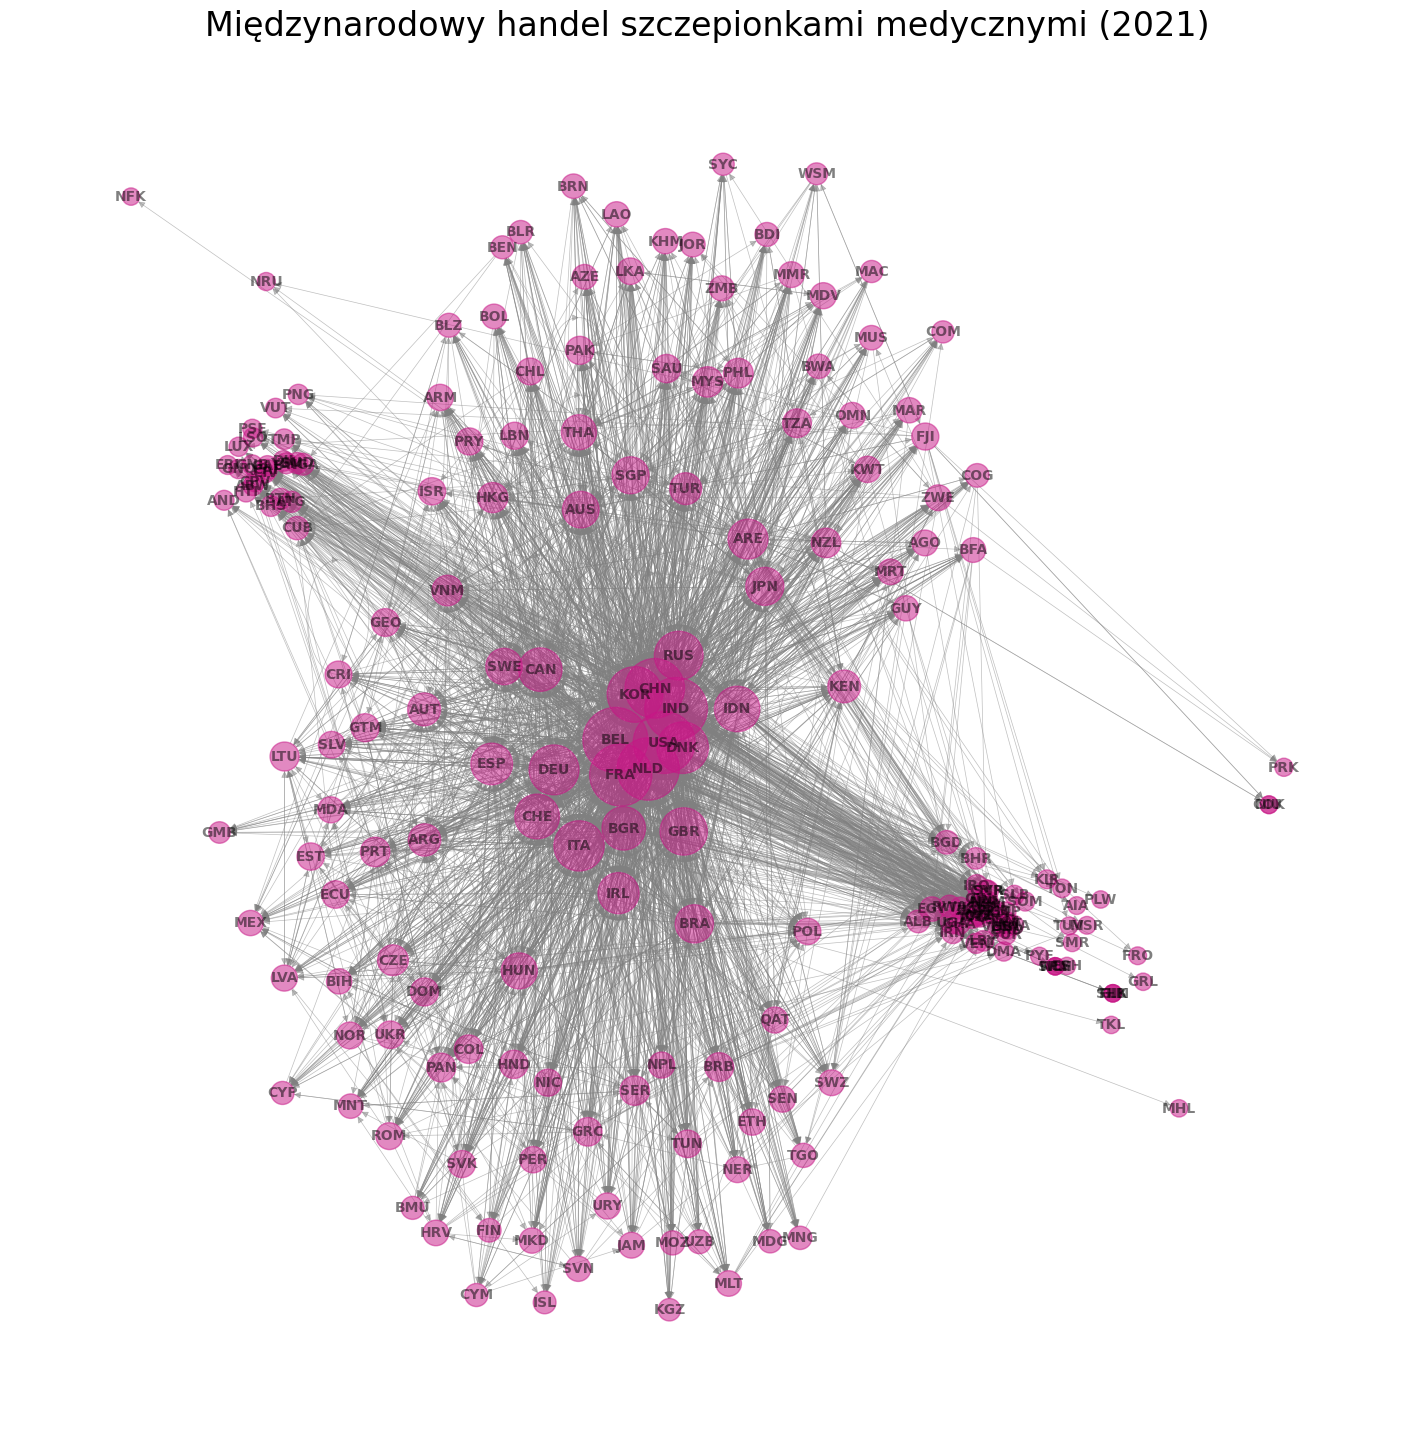

In [268]:
plt.figure(figsize=(18,18))
plt.axis('off')
pos = nx.kamada_kawai_layout(G)
node_size = [150 + v * 7 for v in dict(G.degree()).values()]
nx.draw_networkx(G, pos=pos, node_size=node_size, node_color='mediumvioletred', with_labels=True, alpha=0.5, edge_color='grey',
 width=0.5, font_size=10, font_color='black', font_weight='bold', font_family='sans-serif')
plt.title('Międzynarodowy handel szczepionkami medycznymi (2021)',fontsize = 24)
plt.show()

**5. Rozkłady węzłów i połączeń w sieci**

5.1. Rozkład stopni węzłów (in-degree, out-degree) 


In [269]:
#słownik stopni wierzchołków (wchodzacych i wychodzących)
in_degree = dict(G.in_degree())
out_degree = dict(G.out_degree())

#tworzymy zbiór unikatowych wartości stopni i sortujemy
cleaned_in_degree = list(filter(lambda val: val > 0, in_degree.values()))
cleaned_out_degree = list(filter(lambda val: val > 0, out_degree.values()))

unique_in_degree = sorted(set(cleaned_in_degree))
unique_out_degree = sorted(set(cleaned_out_degree))

#zliczamy ile jest wierzchołków o danym stopniu
in_degree_hist = [cleaned_in_degree.count(i) for i in unique_in_degree]
out_degree_hist = [cleaned_out_degree.count(i) for i in unique_out_degree]


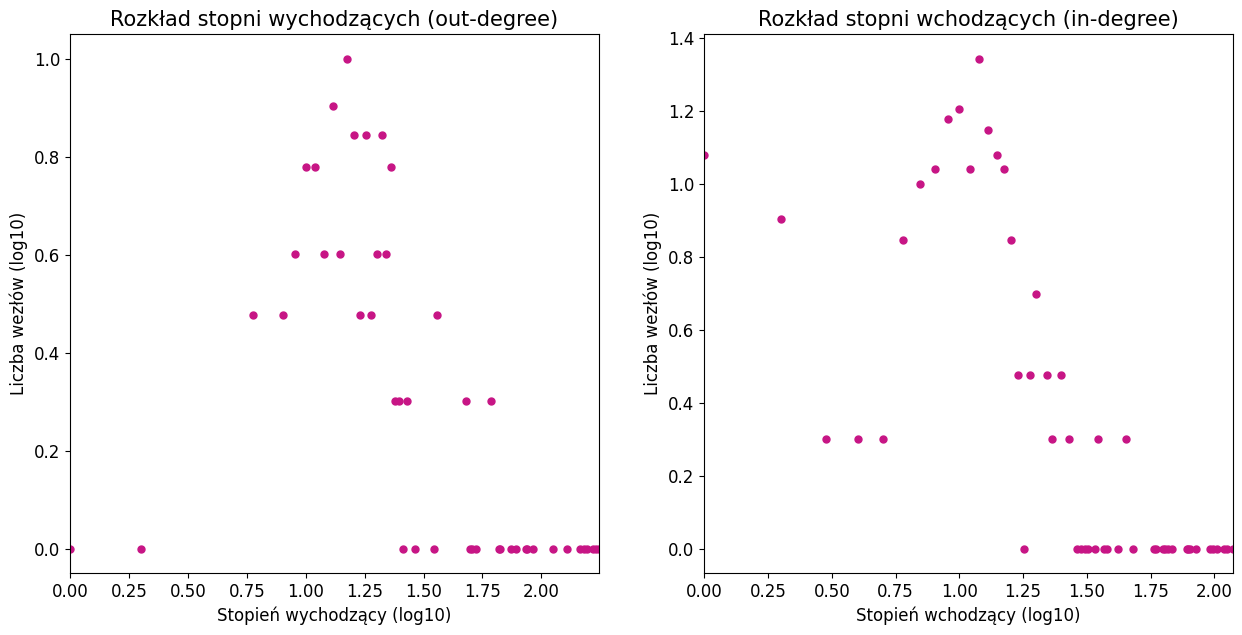

In [270]:
x = np.asarray(unique_out_degree, dtype = float)
y = np.asarray(out_degree_hist, dtype = float)

logx = np.log10(x)
logy = np.log10(y)

z = np.asarray(unique_in_degree, dtype = float)
w = np.asarray(in_degree_hist, dtype = float)

logz = np.log10(z)
logw = np.log10(w)

fig,ax = plt.subplots(1,2,figsize=(15,7))
ax[0].plot(logx, logy, 'o', color='mediumvioletred', markersize=5)
ax[0].set_xlim(min(logx), max(logx))
ax[0].set_xlabel('Stopień wychodzący (log10)', fontsize=12)
ax[0].set_ylabel('Liczba wezłów (log10)', fontsize=12)
ax[0].set_title('Rozkład stopni wychodzących (out-degree)', fontsize=15)
ax[1].plot(logz, logw, 'o', color='mediumvioletred', markersize=5)
ax[1].set_xlim(min(logz), max(logz))
ax[1].set_xlabel('Stopień wchodzący (log10)', fontsize=12)
ax[1].set_ylabel('Liczba wezłów (log10)', fontsize=12)
ax[1].set_title('Rozkład stopni wchodzących (in-degree)', fontsize=15)
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[1].tick_params(axis='both', which='major', labelsize=12)
plt.show()

5.2. Liczba węzłów i połączeń na przestrzeni lat

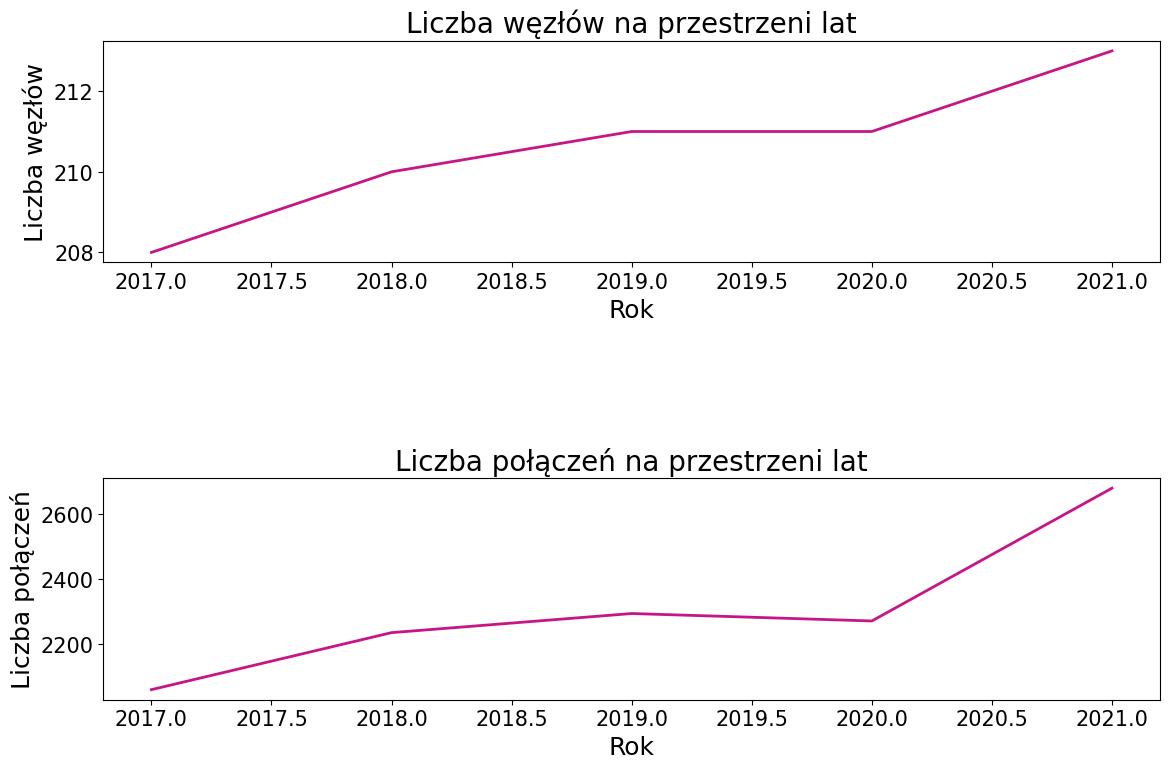

In [271]:
years = sorted(df['Year'].unique())
nodes = []
edges = []
for year in years:
        g = nx.from_pandas_edgelist(df[df['Year'] == year], source='ReporterISO3', target='PartnerISO3',
                edge_attr='TradeValue in 1000 USD', create_using=nx.Graph())
        nodes.append(g.number_of_nodes())
        edges.append(g.number_of_edges())


fig, axes = plt.subplots(2, 1, figsize=(14, 10))
axes[0].plot(years,nodes, color='mediumvioletred')
axes[0].set_title('Liczba węzłów na przestrzeni lat', fontsize=20)
axes[0].set_ylabel('Liczba węzłów', fontsize=18)
axes[0].set_xlabel('Rok', fontsize=18)
axes[1].plot(years,edges, color='mediumvioletred')
axes[1].set_title('Liczba połączeń na przestrzeni lat', fontsize=20)
axes[1].set_ylabel('Liczba połączeń', fontsize=18)
axes[1].set_xlabel('Rok', fontsize=18)
axes[0].tick_params(axis='both', which='major', labelsize=15)
axes[1].tick_params(axis='both', which='major', labelsize=15)
fig.tight_layout(pad=5.0)
plt.show()


5.3. Rozkład stopni węzłów w sieci (2017 vs 2021)

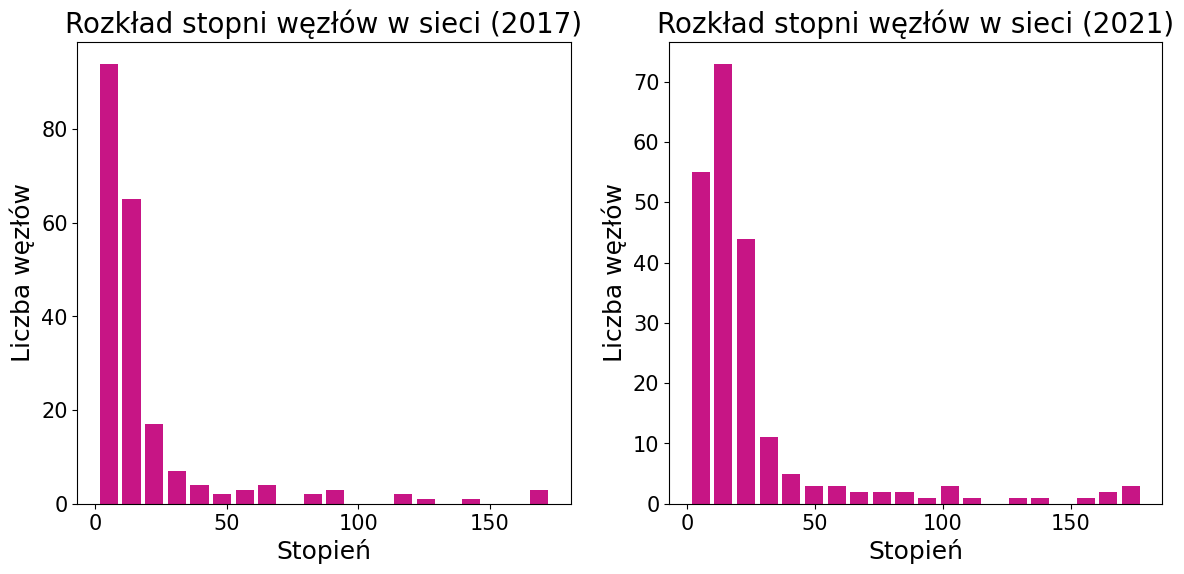

In [272]:
years = sorted(df['Year'].unique())
degrees = {}
for year in years:
        g = nx.from_pandas_edgelist(df[df['Year'] == year], source='ReporterISO3', target='PartnerISO3',
                edge_attr='TradeValue in 1000 USD', create_using=nx.Graph())
        nodes = list(set(g.nodes()))
        degree = [g.degree(n) for n in nodes]
        degrees[year] = degree
        
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].hist(degrees[2017], bins=20, color='mediumvioletred', rwidth=0.8)
axes[0].set_title('Rozkład stopni węzłów w sieci (2017)', fontsize=20)
axes[0].set_xlabel('Stopień', fontsize=18)
axes[0].set_ylabel('Liczba węzłów', fontsize=18)
axes[1].hist(degrees[2021], bins=20, color='mediumvioletred', rwidth=0.8)
axes[1].set_title('Rozkład stopni węzłów w sieci (2021)', fontsize=20)
axes[1].set_xlabel('Stopień', fontsize=18)
axes[1].set_ylabel('Liczba węzłów', fontsize=18)
axes[0].tick_params(axis='both', which='major', labelsize=15)
axes[1].tick_params(axis='both', which='major', labelsize=15)
plt.show()

5.4. Wykres rangi stopni węzłów w sieci

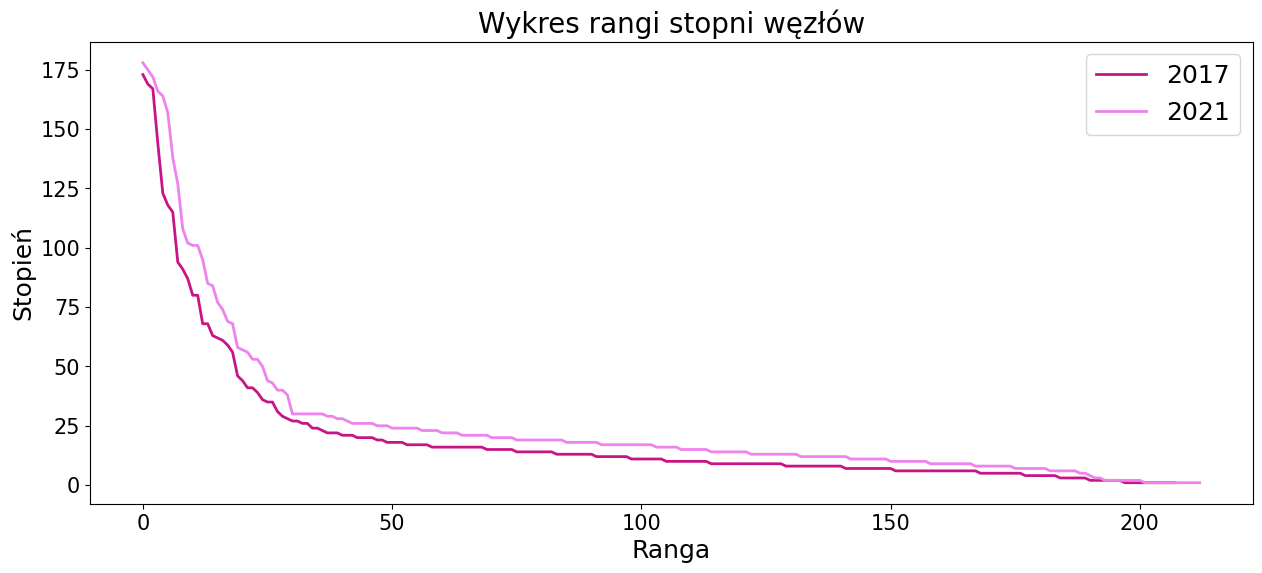

In [273]:
#w normalnej skali
degree_2017 = sorted(degrees[2017], reverse=True)
degree_2021 = sorted(degrees[2021], reverse=True)

fig = plt.figure(figsize=(15, 6))
plt.plot(degree_2017, color='mediumvioletred', label='2017')
plt.plot(degree_2021, color='violet', label='2021')
plt.title('Wykres rangi stopni węzłów', fontsize=20)
plt.xlabel('Ranga', fontsize=18)
plt.ylabel('Stopień', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend()
plt.show()



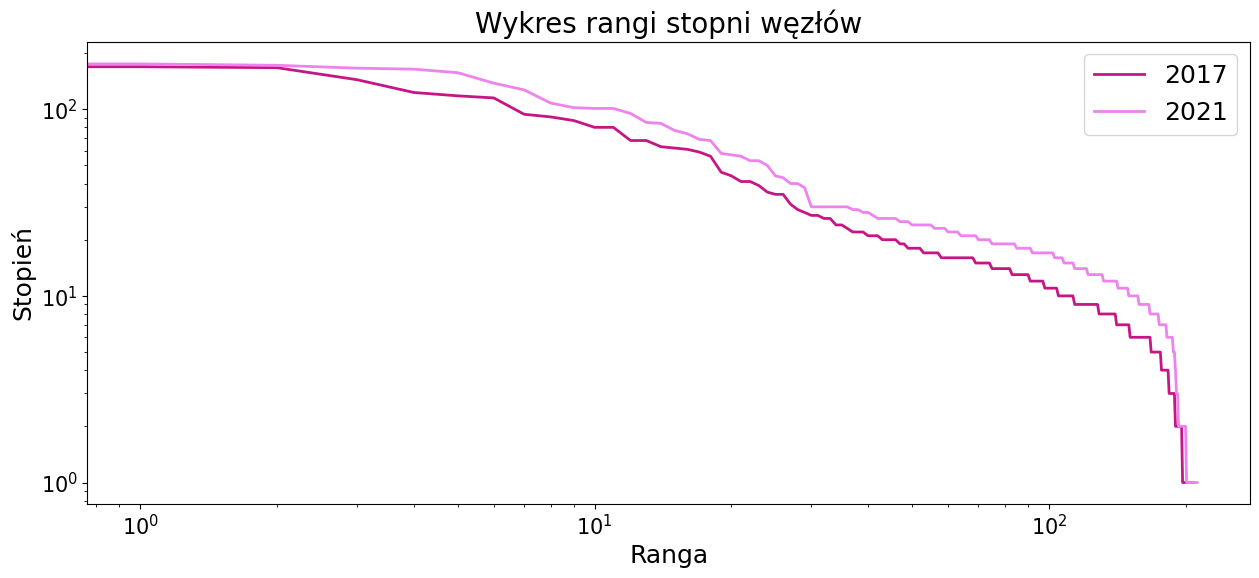

In [274]:
#w skali logarytmicznej 

degree_2017 = sorted(degrees[2017], reverse=True)
degree_2021 = sorted(degrees[2021], reverse=True)

fig = plt.figure(figsize=(15, 6))
plt.plot(degree_2017, color='mediumvioletred', label='2017')
plt.plot(degree_2021, color='violet', label='2021')
plt.xscale('log')
plt.yscale('log')
plt.title('Wykres rangi stopni węzłów', fontsize=20)
plt.xlabel('Ranga', fontsize=18)
plt.ylabel('Stopień', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend()
plt.show()


5.5. Rozkład nowych węzłów i połączeń w sieci 

In [275]:
#distribution of new edges over time
df_new_edges = df.groupby('Year')['TradeValue in 1000 USD'].count()
df_new_edges = df_new_edges.diff()
df_new_edges = df_new_edges.dropna()


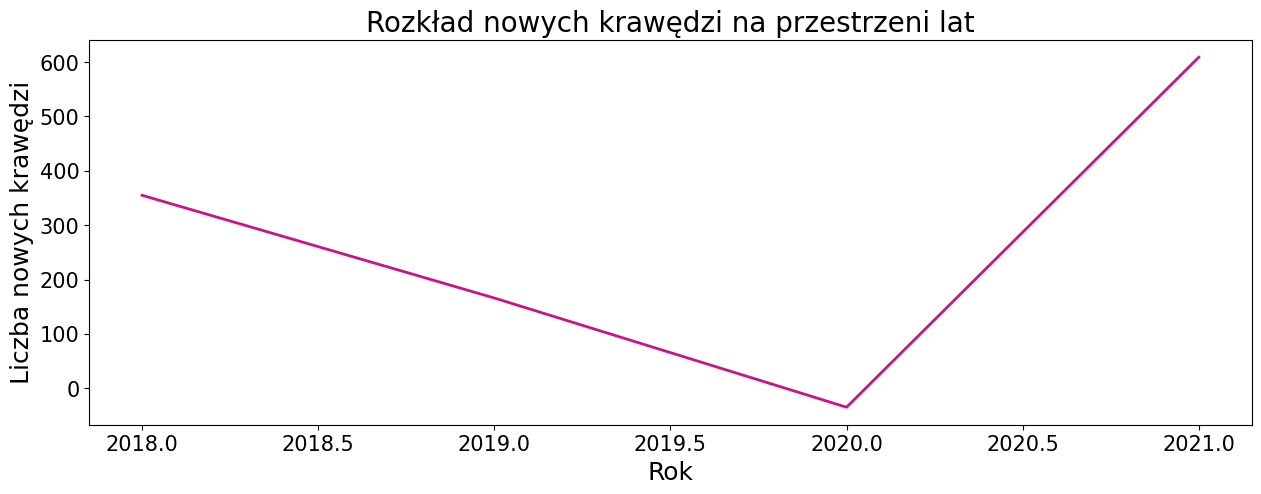

In [276]:
fig = plt.figure(figsize=(15, 5))
plt.plot(df_new_edges, color='mediumvioletred')
plt.title('Rozkład nowych krawędzi na przestrzeni lat', fontsize=20)
plt.xlabel('Rok', fontsize=18)
plt.ylabel('Liczba nowych krawędzi', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()


5.6. Asortatywność sieci - połączenia między węzłami o określonych stopniach

In [277]:
G = nx.from_pandas_edgelist(df_2021, source='ReporterISO3', target='PartnerISO3',
     edge_attr='TradeValue in 1000 USD', create_using=nx.Graph())


In [278]:
def correlation_matrix(G):
    dict = {}
    for node1, degree1 in G.degree():
        degrees = []
        for node2, degree2 in G.degree():
            if (node1,node2) in G.edges():
                degrees.append(degree2)
            else:
                degrees.append(0)
            dict[degree1] = sorted(degrees)
    return dict


In [279]:
cor = correlation_matrix(G)
df_cor = pd.DataFrame(cor, columns=sorted(cor.keys()))
corr_matrix = df_cor.corr()
corr_matrix.tail()

1         2         3         4         5         6         7    \
164  0.327808  0.457918  0.553862  0.490771  0.579790  0.691883  0.775620   
166  0.332898  0.465036  0.562481  0.497856  0.588311  0.700995  0.786011   
172  0.334350  0.467071  0.558571  0.498042  0.587936  0.697783  0.784035   
175  0.332252  0.460073  0.551584  0.492925  0.579974  0.689658  0.775656   
178  0.327570  0.457482  0.549994  0.489500  0.578400  0.689722  0.776654   

          8         9         10   ...       102       108       127  \
164  0.776564  0.795122  0.780765  ...  0.987827  0.990179  0.989812   
166  0.787129  0.806049  0.791444  ...  0.986676  0.988917  0.990777   
172  0.784689  0.804603  0.788921  ...  0.988610  0.990455  0.991409   
175  0.776061  0.796138  0.779998  ...  0.987819  0.989938  0.989307   
178  0.776811  0.797408  0.780446  ...  0.987475  0.989353  0.988695   

          138       157       164       166       172       175       178  
164  0.996044  0.997152  1.000000  0.998765  0.998564  0.998932  0.998186  
166  0.995499  0.997004  0.998765  1.000000  0.999595  0.998747  0.998204  
172  0.996089  0.997094  0.998564  0.999595  1.000000  0.999147  0.998679  
175  0.995735  0.996652  0.998932  0.998747  0.999147  1.000000  0.999575  
178  0.995040  0.996116  0.998186  0.998204  0.998679  0.999575  1.000000  

[5 rows x 57 columns]

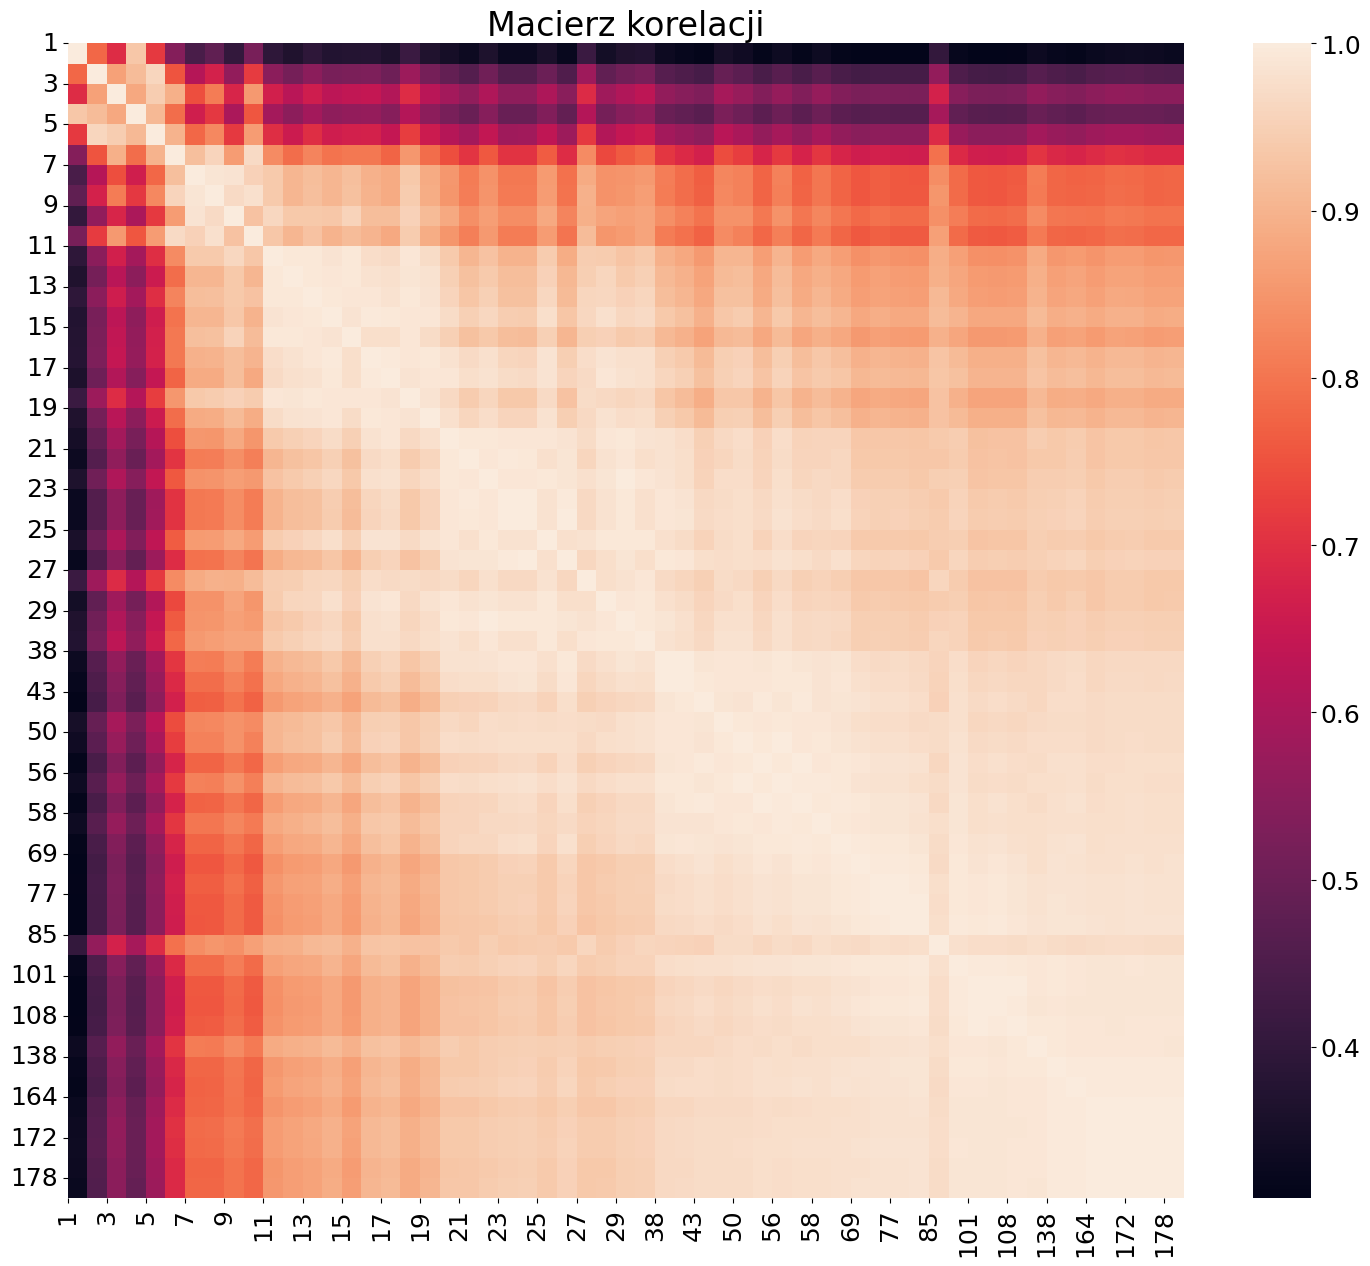

In [280]:
plt.figure(figsize = (18,15))
sns.heatmap(corr_matrix, annot=False, cbar=(True))
plt.title('Macierz korelacji', fontsize=24)
plt.xticks(np.arange(0, len(corr_matrix.columns), 2), corr_matrix.columns[::2], rotation=90)
plt.yticks(np.arange(0, len(corr_matrix.columns), 2), corr_matrix.columns[::2], rotation=0)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()

**6. Miary centralności**

6.1. Pośrednictwo węzłów
 
(= liczba / odsetek najkrótszych ŚCIEŻEK przechodzących przez węzeł)

In [281]:
def BC(df):
    G = nx.from_pandas_edgelist(df, source='ReporterISO3', target='PartnerISO3',
                    edge_attr='TradeValue in 1000 USD', create_using=nx.Graph())
    betweenness = nx.betweenness_centrality(G)
    betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)
    betweenness = pd.DataFrame(betweenness, columns=['node', 'betweenness'])
    return betweenness

df_2017 = df[df['Year'] == 2017]
betweenness_2017 = BC(df_2017)
betweenness_2017.head(10)

node  betweenness
0  IND     0.157060
1  BEL     0.149346
2  FRA     0.144884
3  NLD     0.087108
4  KOR     0.064552
5  USA     0.050434
6  GBR     0.044653
7  BGR     0.035397
8  IDN     0.027577
9  FJI     0.026068

In [282]:
df_2021 = df[df['Year'] == 2021]
betweenness_2021 = BC(df_2021)
betweenness_2021.head(10)

node  betweenness
0  IND     0.112283
1  NLD     0.110639
2  FRA     0.098872
3  BEL     0.089839
4  USA     0.075815
5  CHN     0.065134
6  DNK     0.052946
7  KOR     0.051750
8  GBR     0.048238
9  RUS     0.025801

6.2. Pośrednictwo połączeń  

(= liczba / odsetek najkrótszych DRÓG przechodzących przez krawędź)

In [283]:

def edge_BC(df):
        G = nx.from_pandas_edgelist(df, source='ReporterISO3', target='PartnerISO3',
                edge_attr='TradeValue in 1000 USD', create_using=nx.Graph())
        betweenness = nx.edge_betweenness_centrality(G, normalized=True, weight='TradeValue in 1000 USD')
        betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)
        betweenness = pd.DataFrame(betweenness, columns=['Edge', 'Betweenness'])
        betweenness['Source'] = betweenness['Edge'].apply(lambda x: x[0])
        betweenness['Target'] = betweenness['Edge'].apply(lambda x: x[1])
        betweenness = betweenness.drop('Edge', axis=1)
        return betweenness


betweenness = edge_BC(df_2017)
betweenness.head(10)

Betweenness Source Target
0    96.681852    DOM    PAN
1    47.333417    JAM    PAN
2    26.300878    PAN    IOT
3    22.468911    HTI    PAN
4    16.910107    CRI    PAN
5    10.165817    HND    PAN
6     9.076476    BOL    PAN
7     8.292889    ECU    PAN
8     7.053983    GUY    PAN
9     6.088016    BHS    PAN

In [284]:
betweenness = edge_BC(df_2021)
betweenness.head(10)

Betweenness Source Target
0  25346.353533    ARE    LKA
1  23329.714527    ARE    YEM
2  22585.181324    AGO    ARE
3  14670.569516    ARE    BGR
4  12464.294137    ARE    BRA
5  11822.813079    ARE    SUD
6   7254.987947    ARE    ISR
7   6361.304181    ARE    MYS
8   6109.777154    ARE    BFA
9   6044.987814    ARE    PSE

**7. Detekcja społeczności**


In [285]:
import networkx.algorithms.community as nxcom

G = nx.from_pandas_edgelist(df_2021, source='ReporterISO3', target='PartnerISO3',
        edge_attr='TradeValue in 1000 USD', create_using=nx.Graph())

communities = sorted(nxcom.greedy_modularity_communities(G), key = len, reverse=True)
print(f'Wg algorytmu są {len(communities)} społeczności w sieci w 2021 roku.')

Wg algorytmu są 3 społeczności w sieci w 2021 roku.


In [286]:
#dodwanie atrybutów do węzłów i krawędzi
def set_node_community(G, communities):
        for c, v_c in enumerate(communities):
            for v in v_c:
                # dodajemy 1 aby zapisac 0 dla krawędzi zewnętrznych
                G.nodes[v]['community'] = c + 1

#znajdowanie krawędzi wewnętrznych i dodawanie do ich spolecznosci do ich atrybutów
def set_edge_community(G):
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # krwędzie wewnętrzne oznaczamy jako ich spolecznosc
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # krawedzie zewnetrzne oznaczamy jako 0
            G.edges[v, w]['community'] = 0

#ustawianie kolorów węzłów
def get_color(i, r_off=1, g_off=1, b_off=1):
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

In [287]:
#ustawiamy spolecznosci węzłów i krawędzi
set_node_community(G, communities)
set_edge_community(G)

node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]
node_size = [150 + v * 7 for v in dict(G.degree()).values()]

#ustawiamy kolor krawędzi wewnętrznych(miedzy czlonkami tej samej spolecznosci) i zewnętrznych (miedzy czlonkami roznych spolecznosci)
external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
internal_color = ['silver' for e in internal]

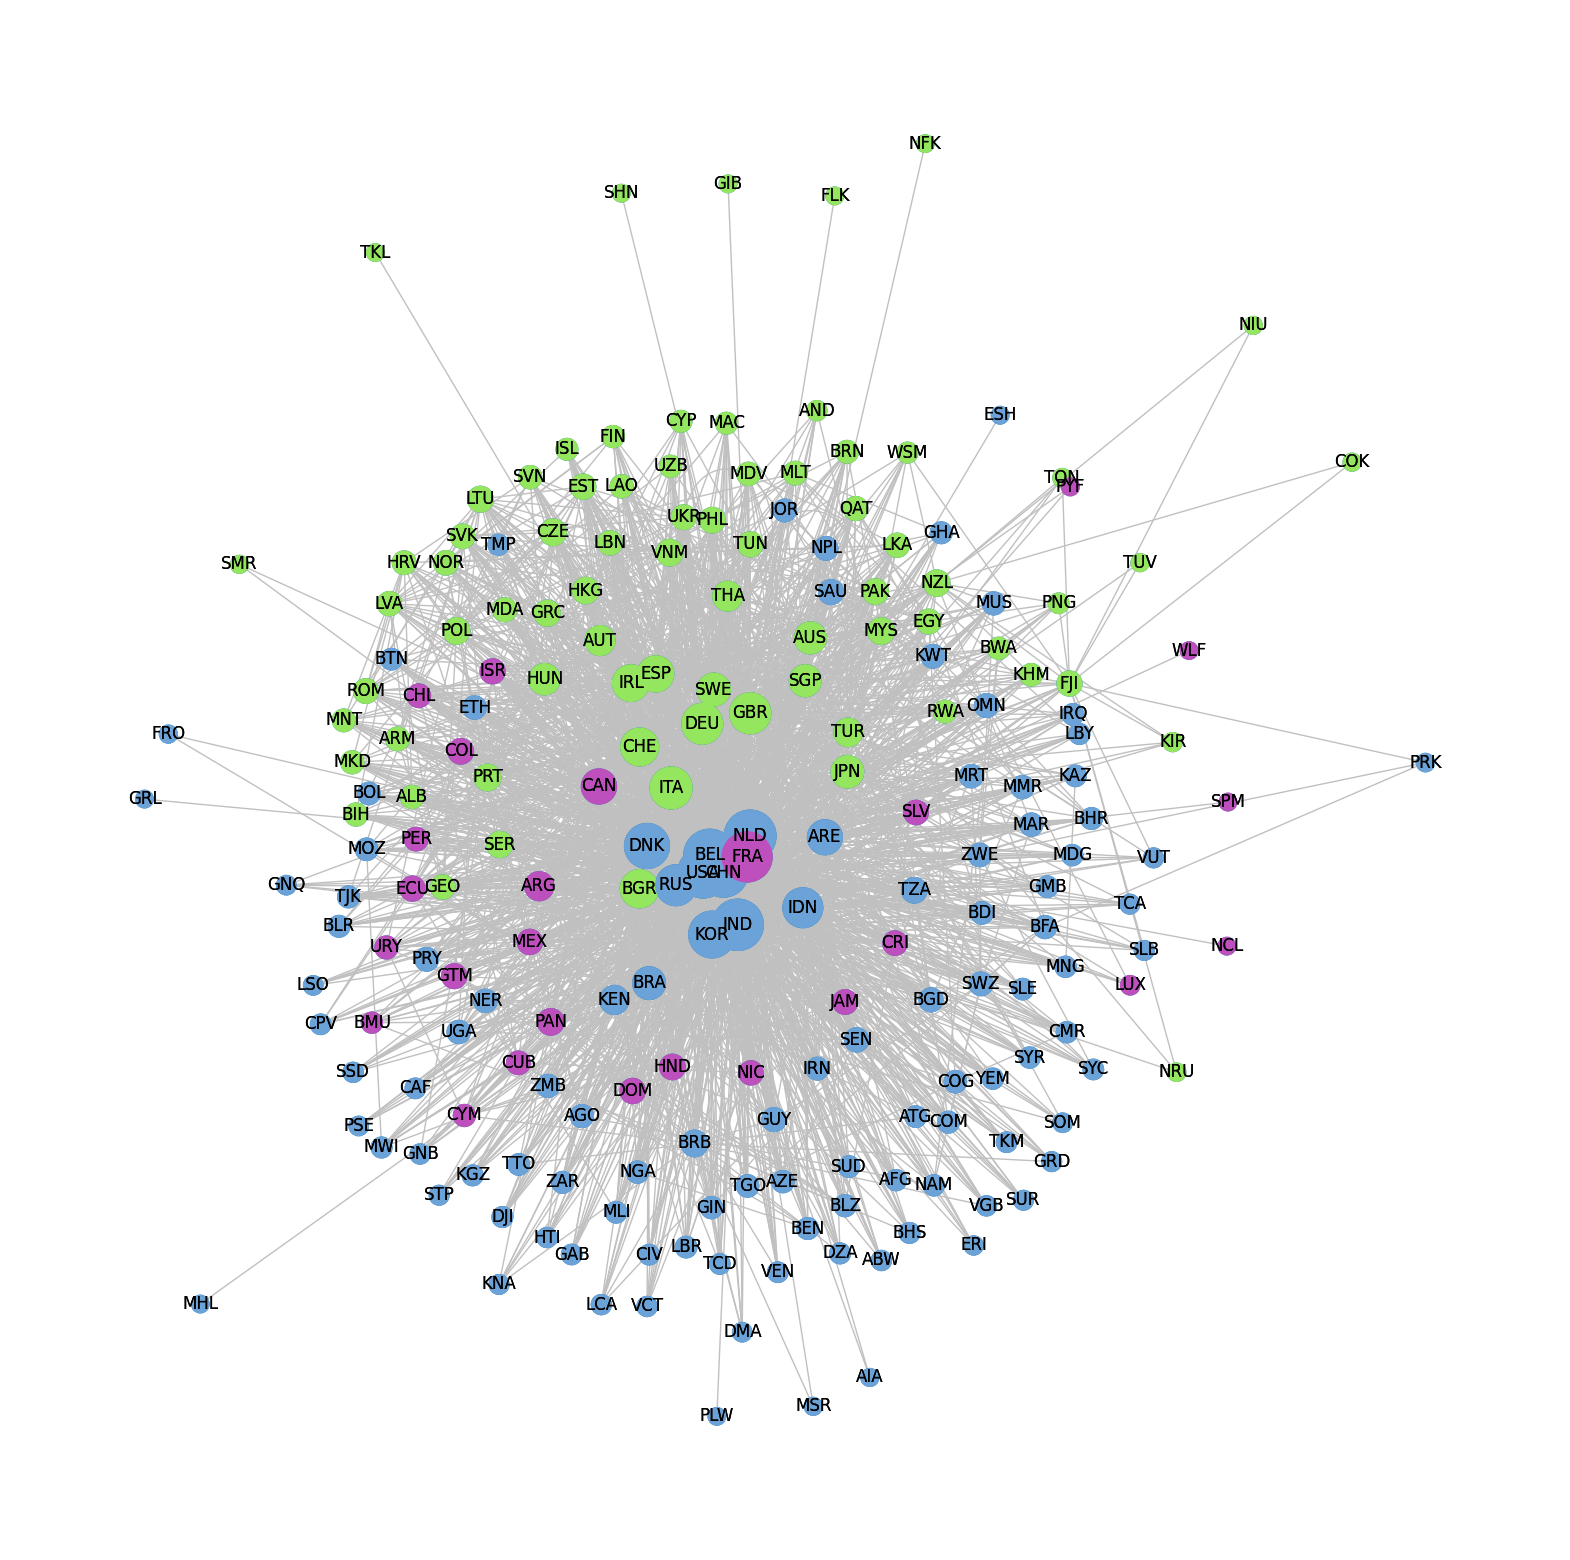

In [288]:
pos = nx.kamada_kawai_layout(G)
plt.rcParams.update({'figure.figsize': (20, 20), 'font.size': 18, 'lines.linewidth': 2, 'lines.markersize': 10})

#rysujemy krawędzie zewnętrzne i węzły
nx.draw_networkx(
    G,
    pos=pos,
    node_size=node_size,
    edgelist=external,
    edge_color="silver")
# rysujemy krawędzie wewnętrzne i węzły
nx.draw_networkx(
    G,
    pos=pos,
    node_color=node_color,
    node_size=node_size,
    edgelist=internal,
    edge_color=internal_color)

plt.axis('off')
plt.show()


Dodatek: Graf podzielony na społeczności z odpowiednim położeniem geograficznym węzłów

In [289]:
countries = pd.read_csv('countries-codes.csv', delimiter=';',  index_col='ISO3 CODE', usecols=['ISO3 CODE', 'geo_point_2d'],)
countries[['Latitude','Longitude']] = countries['geo_point_2d'].str.split(",",expand=True)
countries.drop(['geo_point_2d'], axis=1, inplace=True)
countries.Latitude = countries.Latitude.astype(float)
countries.Longitude = countries.Longitude.astype(float)

pos = {node: (countries.loc[node]['Longitude'], countries.loc[node]['Latitude']) for node in G.nodes() if node in countries.index}

for node in countries.index:
    pos['SUD']= (countries.loc['SDN']['Longitude'], countries.loc['SDN']['Latitude'])
    pos['ROM']= (countries.loc['ROU']['Longitude'], countries.loc['ROU']['Latitude'])
    pos['TMP']= (countries.loc['TLS']['Longitude'], countries.loc['TLS']['Latitude'])
    pos['MNT']= (countries.loc['MNE']['Longitude'], countries.loc['MNE']['Latitude'])
    pos['SER']= (countries.loc['SRB']['Longitude'], countries.loc['SRB']['Latitude'])
    pos['ZAR']= (countries.loc['COG']['Longitude'], countries.loc['COG']['Latitude'])


In [290]:
#ustawiamy spolecznosci węzłów i krawędzi
set_node_community(G, communities)
set_edge_community(G)

node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]
node_size = [150 + v * 7 for v in dict(G.degree()).values()]

#ustawiamy kolor krawędzi wewnętrznych(miedzy czlonkami tej samej spolecznosci) i zewnętrznych (miedzy czlonkami roznych spolecznosci)
external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
internal_color = ['silver' for e in internal]

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


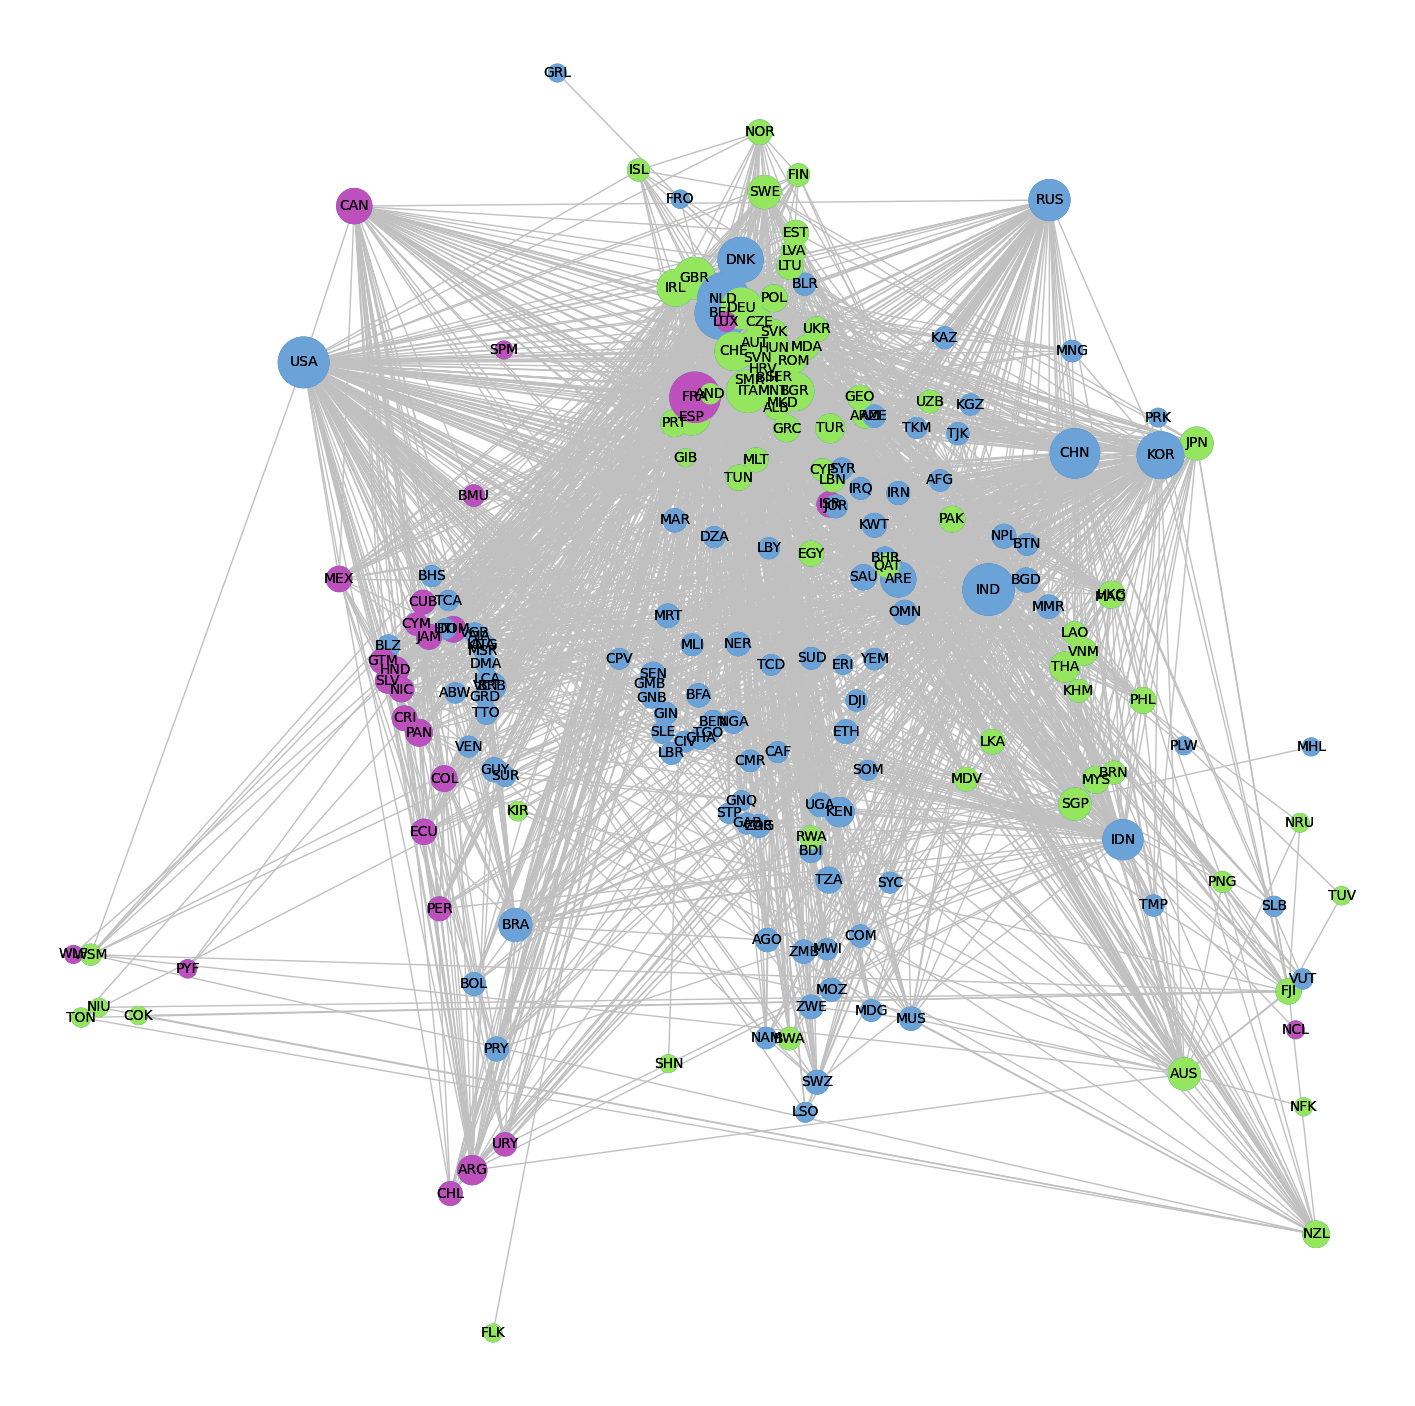

In [291]:
plt.rcParams.update({'figure.figsize': (18, 18), 'font.size': 18, 'lines.linewidth': 2, 'lines.markersize': 1})

#rysujemy krawędzie zewnętrzne i węzły
nx.draw_networkx(
    G,
    pos=pos,
    node_size=node_size,
    edgelist=external,
    edge_color="silver", with_labels=True, font_size=10, font_color='black', font_family='sans-serif', font_weight='normal', bbox=None)
# rysujemy krawędzie wewnętrzne i węzły
nx.draw_networkx(
    G,
    pos=pos,
    node_color=node_color,
    node_size=node_size,
    edgelist=internal,
    edge_color=internal_color, with_labels=True, font_size=10, font_color='black', font_family='sans-serif', font_weight='normal', bbox=None)

plt.axis('off')
plt.show()
